### 6.1.4: Generate Random Latitudes and Longitudes

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import API
import requests
from config import weather_api_key
from citipy import citipy

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b71838867daa8099c35549d8c3aa9c1


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

### 6.2.6: Get The City Weather Data

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
#     print(city_url)

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | ijaki
City not found. Skipping...
Processing Record 2 of Set 13 | cape town
Processing Record 3 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 13 | qaanaaq
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | namibe
Processing Record 7 of Set 13 | husavik
Processing Record 8 of Set 13 | maghama
City not found. Skipping...
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | coquimbo
Processing Record 11 of Set 13 | katsuura
Processing Record 12 of Set 13 | touros
Processing Record 13 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 13 | mataura
Processing Record 15 of Set 13 | carnarvon
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | vestmannaeyjar
Processing Record 18 of Set 13 | port hardy
Processing Record 19 of Set 13 | san andres
Processing Record 20 of Set 13 | storebo
Processing Record 21 of Set 13 | butaritari
Proce

### 6.2.7: Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.12,85,40,5.86,ZA,2021-05-29 18:28:47
1,Qaanaaq,77.4840,-69.3632,31.69,95,49,5.77,GL,2021-05-29 18:31:33
2,Ushuaia,-54.8000,-68.3000,29.86,93,90,9.22,AR,2021-05-29 18:31:51
3,Namibe,-15.1961,12.1522,72.61,78,0,6.13,AO,2021-05-29 18:32:00
4,Husavik,66.0449,-17.3389,58.91,58,100,11.77,IS,2021-05-29 18:32:01
5,Rikitea,-23.1203,-134.9692,77.09,84,100,19.42,PF,2021-05-29 18:32:01
6,Coquimbo,-29.9533,-71.3436,60.80,72,0,12.66,CL,2021-05-29 18:32:02
7,Katsuura,35.1333,140.3000,68.14,92,99,12.15,JP,2021-05-29 18:32:02
8,Touros,-5.1989,-35.4608,85.10,71,4,16.02,BR,2021-05-29 18:32:02
9,Mataura,-46.1927,168.8643,49.48,95,100,4.99,NZ,2021-05-29 18:30:45


In [12]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### 6.3.1: Plot Latitude vs. Temperature

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622314503.6999009

In [16]:
today = time.strftime("%x")
today

'05/29/21'

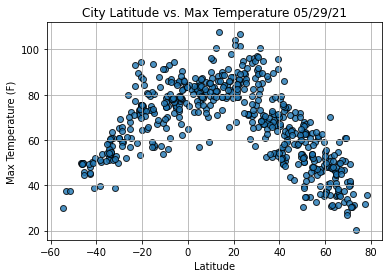

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig1.png")

# Show plot.
plt.show()

### 6.3.2: Plot Latitude vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()